In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#drop the unnamed columns that was created
flights_no_outlier = pd.read_csv('data/flights_no_outlier_iqr.csv')\
                    .drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1)
passengers = pd.read_csv('data/passengers_cleaned.csv').drop(columns=['Unnamed: 0'])

In [3]:
#function to change integer time to standard time in string
def time_row(row):
    row_int = int(row)
    row_str = str(row_int)
    len_row = len(row_str)
    if len_row == 1:
        minute = '00'
        hour = row_str
        row = hour + ':' + minute
    if len_row == 2:
        minute =  '0'+ row_str[1]
        hour = row_str[0]
        row = hour + ':' + minute
    if len_row == 3:
        minute = row_str[1]+row_str[2]
        hour = row_str[0]
        row = hour + ':' + minute
    elif len_row == 4:
        minute = row_str[2] + row_str[3]
        hour = row_str[0] + row_str[1]
        row = hour + ':' + minute
        if row == '24:00':
            row = '23:59'
    return str(row)

In [4]:
#applyting the function and changing to format to date and time
flights_no_outlier['dep_time_format'] = flights_no_outlier['dep_time'].apply(time_row)

flights_no_outlier['dep_time_format'] = pd.to_datetime(\
                                                       flights_no_outlier['dep_time_format'],\
                                                       format='%H:%M').dt.time

taxi_out_mean_hour = flights_no_outlier.groupby(by=[flights_no_outlier\
                                                    .dep_time_format.map(\
                                                    lambda x : (x.hour))])['taxi_out'].mean()
number_of_departures = flights_no_outlier.groupby(by=[flights_no_outlier.dep_time_format.map(lambda x : (x.hour))])['taxi_out'].count()


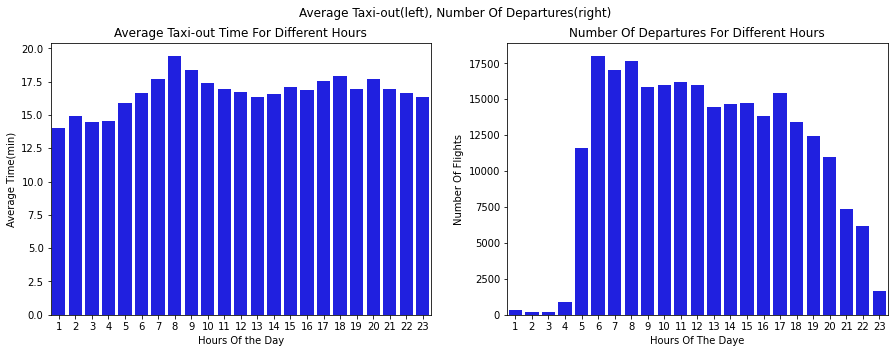

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Average Taxi-out(left), Number Of Departures(right)')

#average departures
sns.barplot(ax=axes[0], x=taxi_out_mean_hour.index, y=taxi_out_mean_hour.values,color='b')
axes[0].set_title('Average Taxi-out Time For Different Hours')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Average Time(min)')
#number of flights
sns.barplot(ax=axes[1], x=number_of_departures.index, y=number_of_departures.values,color='b')
axes[1].set_title('Number Of Departures For Different Hours')
axes[1].set_xlabel('Hours Of The Day')
axes[1].set_ylabel('Number Of Flights')

plt.show()

In [6]:
#Applying the function for arrival times and changing the format to date and time
flights_no_outlier['arrival_time_format'] = flights_no_outlier['arr_time'].apply(time_row)

flights_no_outlier['arrival_time_format'] = pd.to_datetime(\
                                            flights_no_outlier['arrival_time_format'],\
                                            format='%H:%M').dt.time

taxi_in_mean_hour = flights_no_outlier.groupby(by=[flights_no_outlier\
                                                   .arrival_time_format.map(\
                                                    lambda x : (x.hour))])['taxi_in'].mean()
number_of_arrivals = flights_no_outlier.groupby(by=[flights_no_outlier.arrival_time_format.map(lambda x : (x.hour))])['taxi_in'].count()

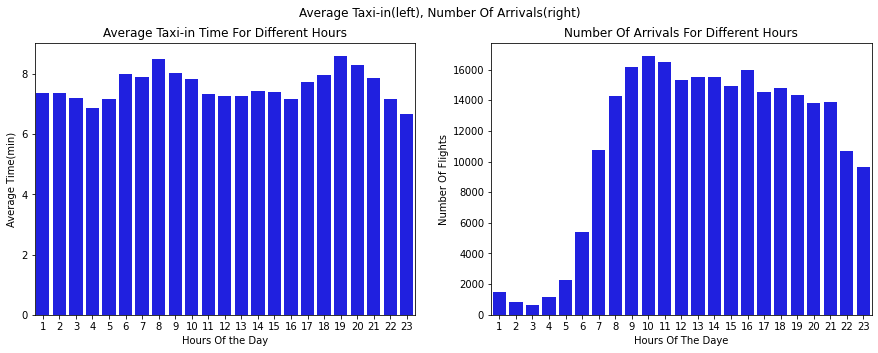

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Average Taxi-in(left), Number Of Arrivals(right)')

#average departures
sns.barplot(ax=axes[0], x=taxi_in_mean_hour.index, y=taxi_in_mean_hour.values,color='b')
axes[0].set_title('Average Taxi-in Time For Different Hours')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Average Time(min)')
#number of flights
sns.barplot(ax=axes[1], x=number_of_arrivals.index, y=number_of_arrivals.values,color='b')
axes[1].set_title('Number Of Arrivals For Different Hours')
axes[1].set_xlabel('Hours Of The Daye')
axes[1].set_ylabel('Number Of Flights')

plt.show()

In [774]:
#exporting the data frame which contains time
#flights_no_outlier.to_csv('data/flights_no_outlier_iqr_time.csv')

In [ ]:
flights_no_outlier.loc[flights_no_outlier.dep_time == 614]